# CNN MNIST

In [2]:
# importing of modules for LeNet CNN 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras import utils
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


In [3]:
# seed for reproducibility
np.random.seed(1671)  

# network and training parameters
N_EPOCH = 20 # later use 20 for better results
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam() # Most optimal optimizer 
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input  dimensions of each MNIST image
N_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1) # 1st Dimension, 2nd Dimension, no. channel

print('Main variables initialised.')

Main variables initialised.


Define LeNet model class for CNN

In [4]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model=Sequential()
        
        # hidden1 conv->pool 
        model.add(Conv2D(20, kernel_size=5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
        
        # hidden2 conv->pool 
        model.add(Conv2D(50, kernel_size=5, padding='same'))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
        
        # hidden3 flatten
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # output 
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        
        return model

print('LeNet Class Defined')
        

LeNet Class Defined


In [5]:
(input_X_train, output_y_train), (input_X_test, output_y_test)=mnist.load_data()

input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')
input_X_train /=255
input_X_test /=255

In [6]:
input_X_train.shape

(60000, 28, 28)

In [7]:
# np.newaxis add one more dimension (60000, 28, 28, 1)
input_X_train = input_X_train[:,:,:,np.newaxis]
input_X_test = input_X_test[:, :, :, np.newaxis]

print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [8]:
input_X_train.shape

(60000, 28, 28, 1)

In [9]:
output_y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# convert class vectors to binary class matrices (one-hot coding)
output_y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_y_test = utils.to_categorical(output_y_test, N_CLASSES)

In [11]:
output_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=N_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

2023-03-09 13:35:52.069022: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
history=model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
375/375 [==============================] - 25s 66ms/step - loss: 0.1772 - accuracy: 0.9463 - val_loss: 0.0693 - val_accuracy: 0.9787
Epoch 2/20
375/375 [==============================] - 29s 79ms/step - loss: 0.0488 - accuracy: 0.9851 - val_loss: 0.0425 - val_accuracy: 0.9886
Epoch 3/20
375/375 [==============================] - 29s 78ms/step - loss: 0.0338 - accuracy: 0.9892 - val_loss: 0.0408 - val_accuracy: 0.9883
Epoch 4/20
375/375 [==============================] - 28s 74ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0344 - val_accuracy: 0.9905
Epoch 5/20
375/375 [==============================] - 27s 72ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0341 - val_accuracy: 0.9906
Epoch 6/20
375/375 [==============================] - 28s 75ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0402 - val_accuracy: 0.9892
Epoch 7/20
375/375 [==============================] - 28s 75ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0352 - val_accuracy:

During the final epoch, the loss was 0.0049 and the accuracy was 0.9986. The validation loss was 0.0521 and the validation accuracy was 0.9901. This suggests that the model is performing well and has high accuracy on both the training and validation sets.

In [14]:
score=model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test Accuracy:', score[1])

313/313 [==============================] - 6s 18ms/step - loss: 0.0381 - accuracy: 0.9910

Test score/loss: 0.03814247250556946
Test Accuracy: 0.9909999966621399


In [15]:
history.history

{'loss': [0.17723135650157928,
  0.04878990724682808,
  0.03375546634197235,
  0.023312747478485107,
  0.016228951513767242,
  0.014448871836066246,
  0.010497163981199265,
  0.009262541308999062,
  0.00643608532845974,
  0.0091167613863945,
  0.006289382930845022,
  0.006783247459679842,
  0.005440413951873779,
  0.003040117211639881,
  0.0023512747138738632,
  0.008070830255746841,
  0.005064109340310097,
  0.0033918486442416906,
  0.0013617102522403002,
  0.003503324231132865],
 'accuracy': [0.9462708234786987,
  0.9851041436195374,
  0.989229142665863,
  0.992479145526886,
  0.9948124885559082,
  0.9954166412353516,
  0.9965416789054871,
  0.997083306312561,
  0.9979166388511658,
  0.9970625042915344,
  0.9976249933242798,
  0.9977291822433472,
  0.9979375004768372,
  0.9987083077430725,
  0.9992916584014893,
  0.9977291822433472,
  0.9980208277702332,
  0.9988958239555359,
  0.9995625019073486,
  0.9986666440963745],
 'val_loss': [0.06934993714094162,
  0.04252001270651817,
  0.04

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


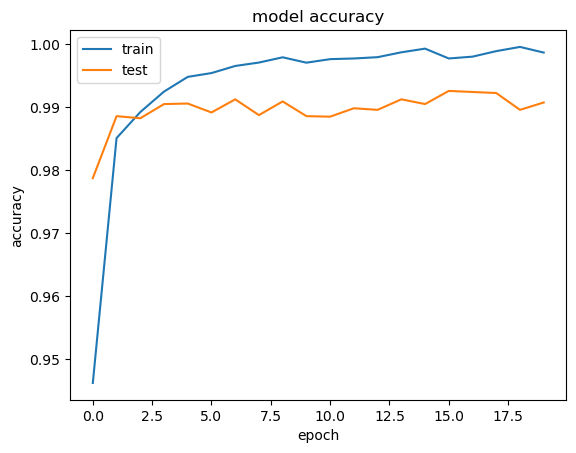

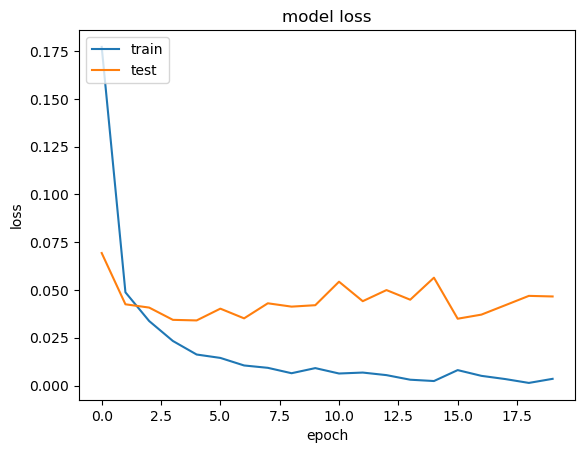

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The training accuracy is higher than the validation accuracy, which is expected. However, you mentioned that the difference between the two accuracies is relatively small, which suggests that the model is not overfitting too much.  

## Save the model configutation in json file

In [18]:
from tensorflow.keras.models import model_from_json

In [19]:
model_json = model.to_json()
open('CNN_MNIST_architecture.json', 'w').write(model_json)
print('Model definition json file saved')

Model definition json file saved


In [20]:
model=model_from_json(model_json)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 20)        520       
                                                                 
 activation (Activation)     (None, 28, 28, 20)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 20)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        25050     
                                                                 
 activation_1 (Activation)   (None, 14, 14, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 50)         0         
 2D)                                                    

In [21]:
history = model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
375/375 [==============================] - 28s 73ms/step - loss: 0.1169 - accuracy: 0.9626 - val_loss: 0.0430 - val_accuracy: 0.9866
Epoch 2/20
375/375 [==============================] - 29s 78ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0490 - val_accuracy: 0.9862
Epoch 3/20
375/375 [==============================] - 28s 75ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 4/20
375/375 [==============================] - 27s 73ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0363 - val_accuracy: 0.9883
Epoch 5/20
375/375 [==============================] - 27s 71ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 6/20
375/375 [==============================] - 27s 72ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0412 - val_accuracy: 0.9893
Epoch 7/20
375/375 [==============================] - 31s 82ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.0384 - val_accuracy:

In [22]:
from tensorflow.keras.models import load_model

model.save('my_model.LeNet')
print('Weight saved for the final epoch', N_EPOCH)

INFO:tensorflow:Assets written to: my_model.LeNet/assets


INFO:tensorflow:Assets written to: my_model.LeNet/assets


Weight saved for the final epoch 20


In [23]:
model = load_model('my_model.LeNet')
print('Loading of the saved weights and test using these trained weights')

Loading of the saved weights and test using these trained weights


In [34]:
score = model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\n Test score/loss: ", score[0])
print("Test Accuracy: ", score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0292 - accuracy: 0.9937

 Test score/loss:  0.029234889894723892
Test Accuracy:  0.9937000274658203


-> load the model saved in json format. It is possible to re-load model and its training faster

## Save the trained weight of the network at the end of the training or at specific timesteps (called checkpoints) 

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
# to save the model during training at specific intervals or when there is an improvement in performance.

from tensorflow.keras.models import load_model
# The saved model will consist of the architecture, weights, and optimizer state of the trained model. 
# The saved model can be used for inference or for further training if needed.

import os
MODEL_DIR="./tmp" 
#  directory named tmp in the current working directory (.) where the script is executed. 
# If the directory does not exist, it will be created automatically.

# let's reduce the number of epoch to 3, for a faster test of the checkpoint utility
N_EPOCH = 3

In [25]:
# checkpoint creation - if directory not existed, create one.
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
checkpoint=ModelCheckpoint(filepath=os.path.join(MODEL_DIR, "my_model-{epoch:02d}.LeNet"))
# the current epoch number will be included in the filename, with a minimum of 2 digits 
# (e.g. "my_model-01.LeNet", "my_model-02.LeNet", etc.)

print('Training with checkpoint at each epoch. Check that at the end of each epoch, there is a weight file in the tmp folder')
model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=0.5, callbacks=[checkpoint])

Training with checkpoint at each epoch. Check that at the end of each epoch, there is a weight file in the tmp folder
Epoch 1/3
234/235 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995

INFO:tensorflow:Assets written to: ./tmp/my_model-01.LeNet/assets


INFO:tensorflow:Assets written to: ./tmp/my_model-01.LeNet/assets


235/235 [==============================] - 22s 91ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0355 - val_accuracy: 0.9937
Epoch 2/3
234/235 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9991

INFO:tensorflow:Assets written to: ./tmp/my_model-02.LeNet/assets


INFO:tensorflow:Assets written to: ./tmp/my_model-02.LeNet/assets


235/235 [==============================] - 20s 87ms/step - loss: 0.0044 - accuracy: 0.9991 - val_loss: 0.0234 - val_accuracy: 0.9956
Epoch 3/3
234/235 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996

INFO:tensorflow:Assets written to: ./tmp/my_model-03.LeNet/assets


INFO:tensorflow:Assets written to: ./tmp/my_model-03.LeNet/assets


235/235 [==============================] - 22s 94ms/step - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.0214 - val_accuracy: 0.9966


In [26]:
score=model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.0376 - accuracy: 0.9926

Test score/loss: 0.03761471435427666
Test accuracy:  0.9926000237464905


In [27]:
# model = 2nd epoch eweight (my_model-02.LeNet)
model=load_model(os.path.join(MODEL_DIR, 'my_model-02.LeNet'))
print('Weight loaded for epoch 2 .')
print('New test using these trained wieghts.')

Weight loaded for epoch 2 .
New test using these trained wieghts.
313/313 [==============================] - 5s 17ms/step - loss: 0.0366 - accuracy: 0.9913

Test score/loss: 0.0366283617913723
Test accuracy: 0.9912999868392944


In [29]:
score = model.evaluate(input_X_test, output_y_test, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 15ms/step - loss: 0.0408 - accuracy: 0.9929

Test score/loss: 0.040773697197437286
Test accuracy: 0.992900013923645


## TensorBoard 

In [28]:
from tensorflow.keras.callbacks import TensorBoard

N_EPOCH=20

tensorboard=TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=0.5, callbacks=[tensorboard])

%load_ext tensorboard
%tensorboard --logdir ./logs

!tensorboard "--logdir=./logs" --host localhost --port 6006

Epoch 1/20
235/235 [==============================] - 21s 89ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.0263 - val_accuracy: 0.9954
Epoch 2/20
235/235 [==============================] - 22s 92ms/step - loss: 8.7596e-04 - accuracy: 0.9998 - val_loss: 0.0267 - val_accuracy: 0.9956
Epoch 3/20
235/235 [==============================] - 23s 96ms/step - loss: 8.2272e-04 - accuracy: 0.9998 - val_loss: 0.0322 - val_accuracy: 0.9951
Epoch 4/20
235/235 [==============================] - 22s 95ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.0248 - val_accuracy: 0.9955
Epoch 5/20
235/235 [==============================] - 21s 87ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0241 - val_accuracy: 0.9952
Epoch 6/20
235/235 [==============================] - 22s 94ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0283 - val_accuracy: 0.9949
Epoch 7/20
235/235 [==============================] - 21s 91ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0211 - val_a

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.

TensorFlow installation not found - running with reduced feature set.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the server with a different port.


# Cifar10

In [1]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

2023-03-09 14:20:38.571436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Libraries imported.


In [2]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


In [4]:
(input_X_train, output_y_train),(input_X_test, output_y_test)=cifar10.load_data()

print('input_X_train shape: ', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 25s 0us/step
input_X_train shape:  (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# output data one-hot encoding 
output_y_train=utils.to_categorical(output_y_train, N_CLASSES)
output_y_test=utils.to_categorical(output_y_test, N_CLASSES)

In [6]:
# To normalize the value in between 0 and 1 (there are 255 kinds)
input_X_train=input_X_train.astype('float32')
input_X_test=input_X_test.astype('float32')

input_X_train /=255
input_X_test /=255

Sample input image: [[[0.6666667  0.7058824  0.7764706 ]
  [0.65882355 0.69803923 0.76862746]
  [0.69411767 0.7254902  0.79607844]
  ...
  [0.63529414 0.7019608  0.84313726]
  [0.61960787 0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]]

 [[0.65882355 0.70980394 0.7764706 ]
  [0.6745098  0.7254902  0.7882353 ]
  [0.67058825 0.7176471  0.78431374]
  ...
  [0.62352943 0.69411767 0.83137256]
  [0.6117647  0.6901961  0.827451  ]
  [0.6039216  0.68235296 0.81960785]]

 [[0.6039216  0.6666667  0.7294118 ]
  [0.58431375 0.64705884 0.70980394]
  [0.5058824  0.5647059  0.63529414]
  ...
  [0.6313726  0.69803923 0.8392157 ]
  [0.6156863  0.69411767 0.83137256]
  [0.6039216  0.68235296 0.81960785]]

 ...

 [[0.2901961  0.32941177 0.3137255 ]
  [0.29803923 0.33333334 0.31764707]
  [0.30588236 0.33333334 0.32156864]
  ...
  [0.2784314  0.29411766 0.30588236]
  [0.26666668 0.28235295 0.29411766]
  [0.23921569 0.25490198 0.26666668]]

 [[0.26666668 0.29803923 0.3019608 ]
  [0.27058825 0.3

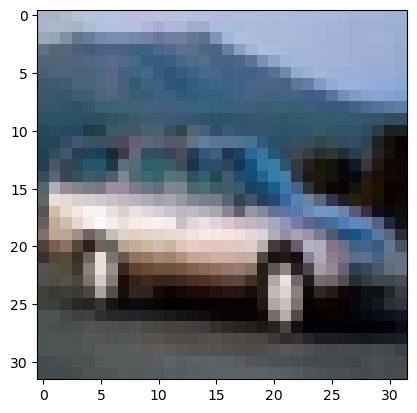

In [8]:
# to visualize
Selected_Image=4 # randomly input the number(this is index of image)
image=input_X_train[Selected_Image]
print("Sample input image: "+str(image))
plt.imshow(image)
plt.show()

Sample input image: [[[0.62352943 0.4        0.39607844]
  [0.5882353  0.35686275 0.37254903]
  [0.6        0.37254903 0.38039216]
  ...
  [0.35686275 0.2784314  0.21960784]
  [0.2901961  0.24705882 0.21568628]
  [0.29803923 0.22745098 0.21568628]]

 [[0.5568628  0.29411766 0.26666668]
  [0.57254905 0.28235295 0.25882354]
  [0.60784316 0.29803923 0.25490198]
  ...
  [0.49803922 0.4117647  0.2784314 ]
  [0.47843137 0.43529412 0.3647059 ]
  [0.3372549  0.27058825 0.23921569]]

 [[0.42745098 0.2627451  0.29411766]
  [0.3882353  0.22745098 0.23529412]
  [0.4117647  0.23137255 0.20392157]
  ...
  [0.5372549  0.4392157  0.3137255 ]
  [0.6392157  0.5176471  0.4117647 ]
  [0.3647059  0.28235295 0.2784314 ]]

 ...

 [[0.95686275 0.5058824  0.27450982]
  [0.9411765  0.48235294 0.25490198]
  [0.94509804 0.47843137 0.25490198]
  ...
  [0.6117647  0.16470589 0.05882353]
  [0.7019608  0.23137255 0.10196079]
  [0.78431374 0.28627452 0.14117648]]

 [[0.9647059  0.52156866 0.2901961 ]
  [0.9529412  0.5

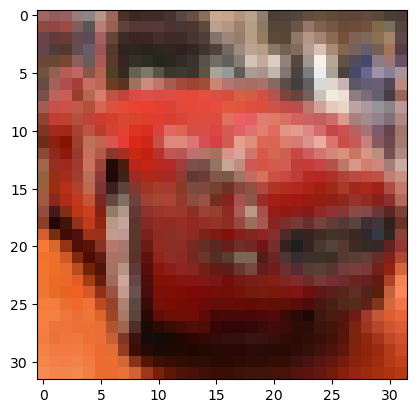

In [9]:
# to visualize different one
Selected_Image=5 # randomly input the number(this is index of image)
image=input_X_train[Selected_Image]
print("Sample input image: "+str(image))
plt.imshow(image)
plt.show()

32 convolutional filters, (3x3 size), Relu activation function </br>
max-pooling (size 2x2, droupout 25%)

dense layer with 512 units and Relu activation, 50% droupout</br>
softmax layer with 10 units/classes as output (one-hot encoded)

In [10]:
model=Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN Network Definition setup')

CNN Network Definition setup


2023-03-09 14:30:46.205874: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

In [12]:
history=model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, 
                  epochs=N_EPOCH, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Epoch 1/20
313/313 [==============================] - 22s 68ms/step - loss: 1.7291 - accuracy: 0.3907 - val_loss: 1.4713 - val_accuracy: 0.4894
Epoch 2/20
313/313 [==============================] - 20s 65ms/step - loss: 1.3715 - accuracy: 0.5135 - val_loss: 1.2496 - val_accuracy: 0.5686
Epoch 3/20
313/313 [==============================] - 20s 65ms/step - loss: 1.2427 - accuracy: 0.5609 - val_loss: 1.1697 - val_accuracy: 0.5874
Epoch 4/20
313/313 [==============================] - 21s 68ms/step - loss: 1.1560 - accuracy: 0.5965 - val_loss: 1.1101 - val_accuracy: 0.6121
Epoch 5/20
313/313 [==============================] - 22s 69ms/step - loss: 1.0828 - accuracy: 0.6220 - val_loss: 1.1802 - val_accuracy: 0.5945
Epoch 6/20
313/313 [==============================] - 22s 70ms/step - loss: 1.0242 - accuracy: 0.6432 - val_loss: 1.0944 - val_accuracy: 0.6195
Epoch 7/20
313/313 [==============================] - 22s 71ms/step - loss: 0.9714 - accuracy: 0.6623 - val_loss: 1.0734 - val_accuracy:

<b>model_from_json</b> is a method in Keras that allows you to save only the architecture of a neural network model to a JSON file. This means that you can save and load the model architecture independently of its weights and training configuration.
--> to save the entire model architecture in a JSON format, including the model's layers, their configurations, and the connectivity information between the layers. This allows the model to be recreated from scratch with the same architecture, without the need to retrain it from scratch. This is particularly useful when we want to share a pre-trained model with others, or when we want to deploy a model in a production environment.

On the other hand, <b>ModelCheckpoint</b> is a callback in Keras that allows you to save the weights of a neural network model during training, either after every epoch or only when the validation loss improves. This means that you can save the trained weights of the model, along with its training configuration and optimizer state, to a file in a specified directory.
--> This is particularly useful when training large models on big datasets, where training can take many hours or even days, and it is not practical to train the model from scratch every time. By saving the weights at regular intervals, we can resume training from where we left off if the training process is interrupted, or if we want to fine-tune the model with additional training.

In [13]:
# save model in json format
model_json=model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

2740

In [15]:
# This line of code saves the weights of a trained model in a file named 'cifar10_weights.h5' in the current directory. 
# The 'overwrite=True' parameter means that if a file with the same name already exists in the directory, it will be overwritten.
model.save_weights('cifar10_weights.h5', overwrite=True)
print('Files saved for model definition and for weights')

Files saved for model definition and for weights


In [16]:
score=model.evaluate(input_X_test, output_y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print("Test accuracy: ", score[1])

79/79 [==============================] - 1s 17ms/step - loss: 1.0475 - accuracy: 0.6699

Test score/loss: 1.0475218296051025
Test accuracy:  0.6699000000953674


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


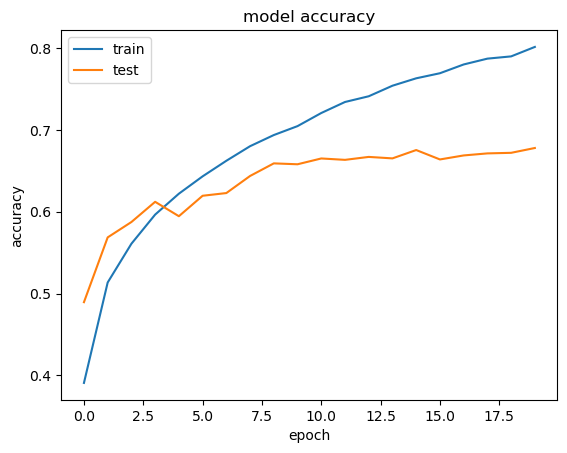

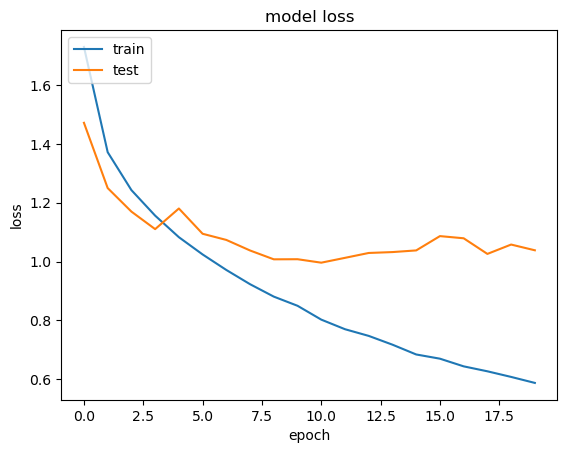

In [20]:
# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Lots of overfitting observed ! Need to improve the model!
-> The CIFAR-10 dataset is relatively small (50,000 training images), and the model may have learned to memorize the training data instead of generalizing well to new data.<br/>

-> To address this issue <br/>

Augment the training data: Data augmentation can help increase the effective size of the training dataset and reduce overfitting. You can apply techniques such as random rotations, flips, and crops to generate new training images.

Reduce the model complexity: You can try reducing the number of parameters in the model by reducing the number of convolutional filters, the number of units in the dense layer, or both. You can also try using smaller filter sizes.

Increase regularization: You can try increasing the dropout rates or adding other forms of regularization, such as L1 or L2 regularization.

Use early stopping: Early stopping is a technique where the training is stopped when the model performance on the validation set starts to decrease. This can help prevent overfitting by stopping the training before the model starts to overfit.

## A deeper CNN

In [21]:
N_EPOCH = 40 # bigger network will benefit from extra training epochs

The number of epochs is a hyperparameter that determines how many times the training algorithm will iterate over the entire training dataset. Setting the number of epochs too low can lead to underfitting, while setting it too high can lead to overfitting.

In general, larger networks with more parameters require more epochs to train effectively, so increasing the number of epochs can be beneficial for bigger networks. However, it's important to monitor the training progress and check for signs of overfitting, such as a decreasing validation accuracy, and adjust the number of epochs accordingly.

Therefore, setting the number of epochs to 40 might be appropriate for a larger network with many parameters, but it's always a good practice to monitor the training progress and adjust hyperparameters as needed.

In [22]:
# Complex DNN model definition
model = Sequential()

# hidden 1 : conv + conv + pool + dropout 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# hidden 2 : conv + conv + pool + dropout 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
# hidden 3 : flatten + droupout 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# output 
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                      

In [24]:
history=model.fit(input_X_train, output_y_train, batch_size=BATCH_SIZE, verbose=VERBOSE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT)

Epoch 1/40
313/313 [==============================] - 45s 140ms/step - loss: 1.9647 - accuracy: 0.2679 - val_loss: 1.8487 - val_accuracy: 0.3178
Epoch 2/40
313/313 [==============================] - 50s 158ms/step - loss: 1.6354 - accuracy: 0.3990 - val_loss: 1.4158 - val_accuracy: 0.4786
Epoch 3/40
313/313 [==============================] - 47s 150ms/step - loss: 1.4666 - accuracy: 0.4674 - val_loss: 1.3450 - val_accuracy: 0.5083
Epoch 4/40
313/313 [==============================] - 47s 151ms/step - loss: 1.3668 - accuracy: 0.5089 - val_loss: 1.2245 - val_accuracy: 0.5619
Epoch 5/40
313/313 [==============================] - 47s 149ms/step - loss: 1.2785 - accuracy: 0.5418 - val_loss: 1.4540 - val_accuracy: 0.4982
Epoch 6/40
313/313 [==============================] - 48s 155ms/step - loss: 1.2221 - accuracy: 0.5623 - val_loss: 1.1254 - val_accuracy: 0.6023
Epoch 7/40
313/313 [==============================] - 45s 143ms/step - loss: 1.1699 - accuracy: 0.5846 - val_loss: 1.0754 - val_ac

79/79 [==============================] - 3s 32ms/step - loss: 0.8769 - accuracy: 0.7168

Test score/loss: 0.8769187331199646
Test accuracy: 0.7167999744415283
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


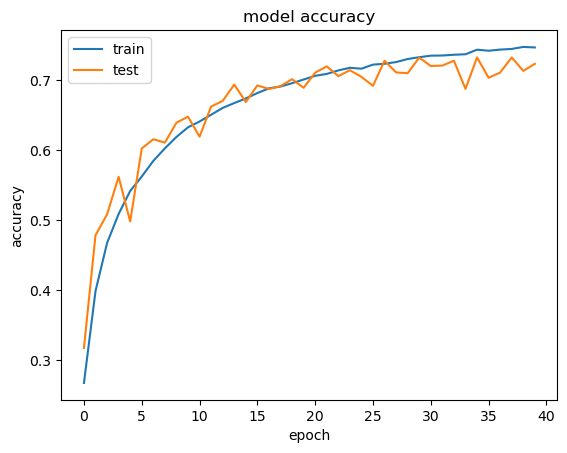

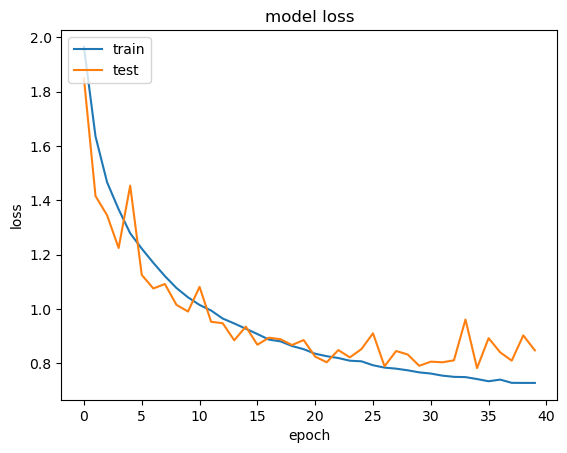

In [26]:
#Testing
score = model.evaluate(input_X_test, output_y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Still, bit of overfittin obeserved. As mentioned above, we can do data augmentation to increase the effective size of the training data. 

### Data Augmentation

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rotation_range=40, 
                           width_shift_range=0.2, 
                           height_shift_range=0.2, 
                           zoom_range=0.2, 
                           horizontal_flip=True, 
                           fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift

In [29]:
datagen.fit(input_X_train)

# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_y_train, batch_size=BATCH_SIZE), 
                              steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, 
                              epochs=N_EPOCH, 
                              verbose=VERBOSE)

Epoch 1/40


/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_5016/2506695707.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_y_train, batch_size=BATCH_SIZE),


390/390 [==============================] - 66s 167ms/step - loss: 1.4934 - accuracy: 0.4839
Epoch 2/40
390/390 [==============================] - 69s 176ms/step - loss: 1.4305 - accuracy: 0.5031
Epoch 3/40
390/390 [==============================] - 70s 180ms/step - loss: 1.4132 - accuracy: 0.5102
Epoch 4/40
390/390 [==============================] - 69s 177ms/step - loss: 1.3967 - accuracy: 0.5156
Epoch 5/40
390/390 [==============================] - 72s 185ms/step - loss: 1.3879 - accuracy: 0.5179
Epoch 6/40
390/390 [==============================] - 67s 172ms/step - loss: 1.3862 - accuracy: 0.5177
Epoch 7/40
390/390 [==============================] - 67s 173ms/step - loss: 1.3717 - accuracy: 0.5238
Epoch 8/40
390/390 [==============================] - 67s 171ms/step - loss: 1.3624 - accuracy: 0.5287
Epoch 9/40
390/390 [==============================] - 66s 168ms/step - loss: 1.3617 - accuracy: 0.5301
Epoch 10/40
390/390 [==============================] - 66s 169ms/step - loss: 1.3581

79/79 [==============================] - 3s 33ms/step - loss: 1.1666 - accuracy: 0.6026

Test score/loss: 1.1665945053100586
Test accuracy: 0.6025999784469604
dict_keys(['loss', 'accuracy'])


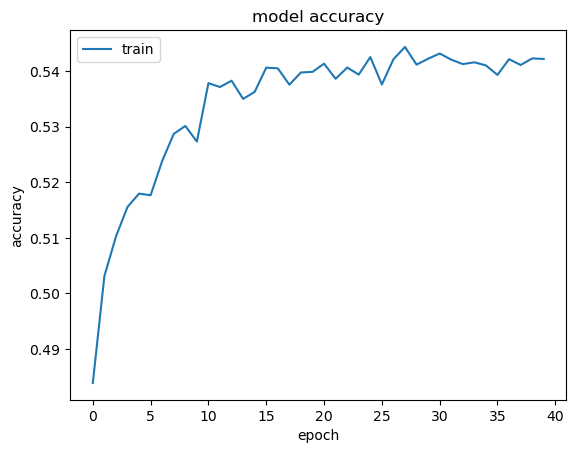

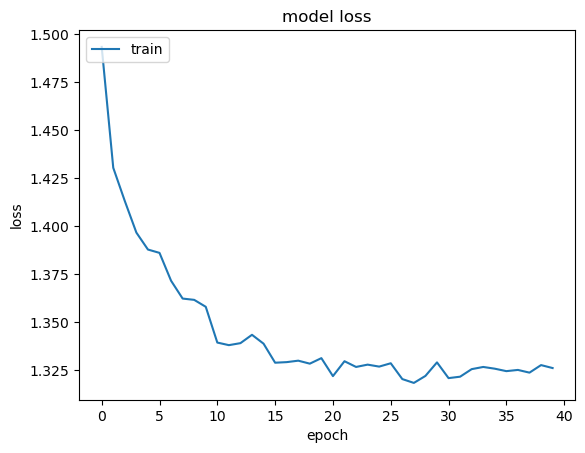

In [31]:
#Testing
score = model.evaluate(input_X_test, output_y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test loss is still high at 1.1666, which suggests that the model is still overfitting and there may be room for further improvement.

In [33]:
# Another parameter setting for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

In [34]:
history = model.fit_generator(datagen.flow(input_X_train, output_y_train, batch_size=BATCH_SIZE), 
                              steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)

Epoch 1/40


/var/folders/0x/n51_7s_n09dfndljqk4rv2zr0000gn/T/ipykernel_5016/1391450942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(input_X_train, output_y_train, batch_size=BATCH_SIZE),


390/390 [==============================] - 63s 161ms/step - loss: 1.1116 - accuracy: 0.6174
Epoch 2/40
390/390 [==============================] - 67s 172ms/step - loss: 1.0819 - accuracy: 0.6312
Epoch 3/40
390/390 [==============================] - 59s 152ms/step - loss: 1.0672 - accuracy: 0.6327
Epoch 4/40
390/390 [==============================] - 60s 153ms/step - loss: 1.0669 - accuracy: 0.6360
Epoch 5/40
390/390 [==============================] - 63s 160ms/step - loss: 1.0770 - accuracy: 0.6316
Epoch 6/40
390/390 [==============================] - 67s 171ms/step - loss: 1.0615 - accuracy: 0.6404
Epoch 7/40
390/390 [==============================] - 69s 177ms/step - loss: 1.0580 - accuracy: 0.6381
Epoch 8/40
390/390 [==============================] - 61s 156ms/step - loss: 1.0655 - accuracy: 0.6380
Epoch 9/40
390/390 [==============================] - 63s 161ms/step - loss: 1.0577 - accuracy: 0.6391
Epoch 10/40
390/390 [==============================] - 63s 162ms/step - loss: 1.0563

79/79 [==============================] - 3s 32ms/step - loss: 0.9972 - accuracy: 0.6565

Test score/loss: 0.9971599578857422
Test accuracy: 0.656499981880188
dict_keys(['loss', 'accuracy'])


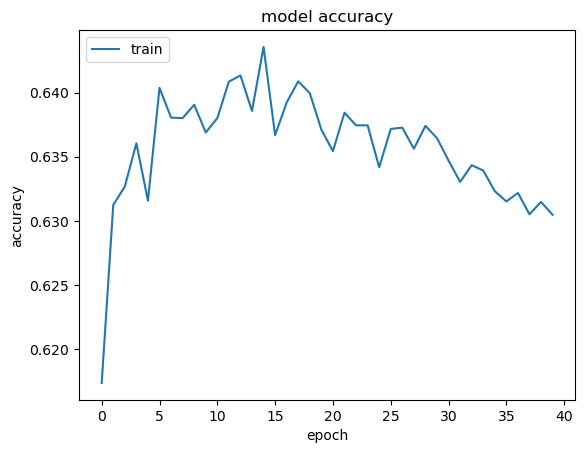

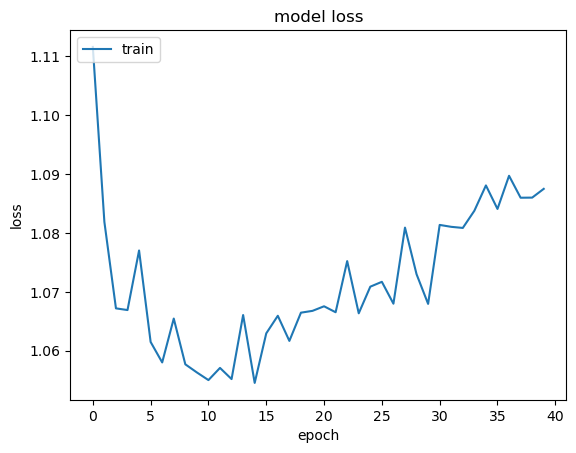

In [35]:
#Testing
score = model.evaluate(input_X_test, output_y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()